___
# Ciência dos Dados - PROJETO 1

## Pedro Henrique Daher
___

## Acesso a tecnologia de acordo com o nível de escolaridade e renda.


___
## Introdução

### Possuir celular, ter acesso a internet e a outros meios de tecnologia é algo que ao decorrer dos anos vem crescendo muito no mundo todo, porém uma considerável parcela da sociedade ainda não possui tais privilégios.
### Por meio dessa pesquisa, eu gostaria de observar o comportamento individual da população brasileira quanto ao acesso a tecnologia e verificar se a renda, o nível de escolaridade e diversos outros aspectos influenciam ou não em tal analise.  Utilizando os dados do PNAD 2011 e 2015 - Arquivo de pessoas, será possível escolher as variáveis necessárias para esta pesquisa e chegar a um resultado significativo, e ao final comparar se houve alguma evolução entre os anos de 2011 e 2015



___
## Filtros da base de dados

In [46]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [37]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Pedro Daher\Downloads


In [38]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
tabela11=pd.read_csv('PES2011csv.zip', compression='zip', header=0, sep=',', quotechar='"')
tabela15=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [39]:
cut11=tabela11.loc[:,['V0101','UF','V0302','V8005','V0601','V0602','V6002','V6003','V9532','V06111','V06112','V4720']]

cut11=cut11.rename(columns={'V0101': 'Ano'})
cut11=cut11.rename(columns={'UF': 'Estado'})
cut11=cut11.rename(columns={'V0302': 'Sexo'})
cut11=cut11.rename(columns={'V8005': 'Idade'})
cut11=cut11.rename(columns={'V0601': 'LerEscrever'})
cut11=cut11.rename(columns={'V0602': 'FrequentaEscola'})
cut11=cut11.rename(columns={'V6002': 'RedeDeEnsino'})
cut11=cut11.rename(columns={'V6003': 'GrauDoCurso'})
cut11=cut11.rename(columns={'V9532': 'RendimentoMensalDotrabalho'}) #Quantitativa
cut11=cut11.rename(columns={'V06111': 'UtilizouInternetNoUltimoMês'})
cut11=cut11.rename(columns={'V06112': 'PossuiCelular'})
cut11=cut11.rename(columns={'V4720': 'RendimentoMensalTotal'}) #Quantitativa

cut11.Sexo=cut11.Sexo.astype("category")
cut11.Sexo.cat.categories=('Masculino','Feminino')
cut11.LerEscrever=cut11.LerEscrever.astype("category")
cut11.LerEscrever.cat.categories=('Sim','Não')
cut11.FrequentaEscola=cut11.FrequentaEscola.astype("category")
cut11.FrequentaEscola.cat.categories=('Sim','Não')
cut11.RedeDeEnsino=cut11.RedeDeEnsino.astype("category")
cut11.RedeDeEnsino.cat.categories=('Pública','Privada') 
cut11.GrauDoCurso=cut11.GrauDoCurso.astype("category")
cut11.GrauDoCurso.cat.categories=('Regular do ensino fundamental',"Regular do ensino médio","Educação de jovens e adultos ou supletivo do ensino fundamental", "Educação de jovens e adultos ou supletivo do ensino médio","Superior - de graduaçã0","Alfabetização de jovens e adultos","Creche","Classe de alfabetização - CA"," Maternal, jardim de infância etc.","Pré-vestibular","Mestrado ou doutorado")
cut11.UtilizouInternetNoUltimoMês=cut11.UtilizouInternetNoUltimoMês.astype("category")
cut11.UtilizouInternetNoUltimoMês.cat.categories=('Sim','Não')
cut11.PossuiCelular=cut11.PossuiCelular.astype("category")
cut11.PossuiCelular.cat.categories=('Sim','Não')

cut11.head(5)

,Ano,Estado,Sexo,Idade,LerEscrever,FrequentaEscola,RedeDeEnsino,GrauDoCurso,RendimentoMensalDotrabalho,UtilizouInternetNoUltimoMês,PossuiCelular,RendimentoMensalTotal
0,2011,11,Masculino,49,Sim,Não,NaN,NaN,1.000000e+12,Não,Sim,1.000000e+12
1,2011,11,Feminino,33,Sim,Sim,Privada,Superior - de graduaçã0,NaN,Sim,Sim,0.000000e+00
2,2011,11,Feminino,15,Sim,Sim,Pública,Regular do ensino médio,NaN,Sim,Não,0.000000e+00
3,2011,11,Masculino,9,Sim,Sim,Pública,Regular do ensino fundamental,NaN,NaN,NaN,NaN
4,2011,11,Feminino,51,Sim,Não,NaN,NaN,2.800000e+03,Não,Sim,5.300000e+03


In [40]:
cut15=tabela15.loc[:,['V0101','UF','V0302','V8005','V0601','V0602','V6002','V6003','V9532','V06111','V06112','V4720']]

cut15=cut15.rename(columns={'V0101': 'Ano'})
cut15=cut15.rename(columns={'UF': 'Estado'})
cut15=cut15.rename(columns={'V0302': 'Sexo'})
cut15=cut15.rename(columns={'V8005': 'Idade'})
cut15=cut15.rename(columns={'V0601': 'LerEscrever'})
cut15=cut15.rename(columns={'V0602': 'FrequentaEscola'})
cut15=cut15.rename(columns={'V6002': 'RedeDeEnsino'})
cut15=cut15.rename(columns={'V6003': 'GrauDoCurso'})
cut15=cut15.rename(columns={'V9532': 'RendimentoMensalDoTrabalho'}) #Quantitativa
cut15=cut15.rename(columns={'V06111': 'UtilizouInternetNoUltimoMês'})
cut15=cut15.rename(columns={'V06112': 'PossuiCelular'})
cut15=cut15.rename(columns={'V4720': 'RendimentoMensalTotal'}) #Quantitativa

cut15.Sexo=cut15.Sexo.astype("category")
cut15.Sexo.cat.categories=('Masculino','Feminino')
cut15.LerEscrever=cut15.LerEscrever.astype("category")
cut15.LerEscrever.cat.categories=('Sim','Não')
cut15.FrequentaEscola=cut15.FrequentaEscola.astype("category")
cut15.FrequentaEscola.cat.categories=('Sim','Não')
cut15.RedeDeEnsino=cut15.RedeDeEnsino.astype("category")
cut15.RedeDeEnsino.cat.categories=('Pública','Privada') 
cut15.GrauDoCurso=cut15.GrauDoCurso.astype("category")
cut15.GrauDoCurso.cat.categories=('Regular do ensino fundamental',"Regular do ensino médio","Educação de jovens e adultos ou supletivo do ensino fundamental", "Educação de jovens e adultos ou supletivo do ensino médio","Superior - de graduaçã0","Alfabetização de jovens e adultos","Creche","Classe de alfabetização - CA"," Maternal, jardim de infância etc.","Pré-vestibular","Mestrado ou doutorado")
cut15.UtilizouInternetNoUltimoMês=cut15.UtilizouInternetNoUltimoMês.astype("category")
cut15.UtilizouInternetNoUltimoMês.cat.categories=('Sim','Não')
cut15.PossuiCelular=cut15.PossuiCelular.astype("category")
cut15.PossuiCelular.cat.categories=('Sim','Não')
cut15.head()

,Ano,Estado,Sexo,Idade,LerEscrever,FrequentaEscola,RedeDeEnsino,GrauDoCurso,RendimentoMensalDoTrabalho,UtilizouInternetNoUltimoMês,PossuiCelular,RendimentoMensalTotal
0,2015,11,Masculino,23,Sim,Não,NaN,NaN,800.0,Sim,Sim,800.0
1,2015,11,Feminino,23,Sim,Não,NaN,NaN,1150.0,Sim,Sim,1150.0
2,2015,11,Feminino,35,Sim,Sim,Privada,Superior - de graduaçã0,880.0,Sim,Sim,880.0
3,2015,11,Masculino,34,Sim,Não,NaN,NaN,3000.0,Sim,Sim,3000.0
4,2015,11,Feminino,11,Sim,Sim,Privada,Regular do ensino fundamental,NaN,Sim,Sim,0.0


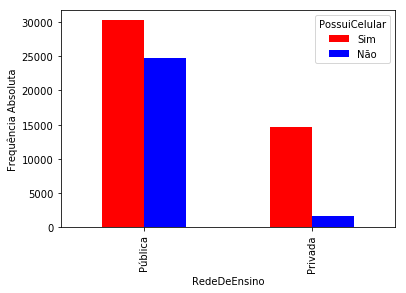

In [51]:
ct1 = pd.crosstab(cut11.RedeDeEnsino, cut11.PossuiCelular)
ct1.plot(kind='bar', color=('red', 'blue'))
plt.ylabel('Frequência Absoluta')

In [45]:
cut11.RendimentoMensalDotrabalho.describe()

count    1.573390e+05
mean     3.795626e+10
std      1.910911e+11
min      1.000000e+00
25%      5.450000e+02
50%      8.000000e+02
75%      1.500000e+03
max      1.000000e+12
Name: RendimentoMensalDotrabalho, dtype: float64

In [47]:
FaixasRenda = arange(1,3000,100)
Renda_cat = pd.cut(cut11.RendimentoMensalDotrabalho,bins = FaixasRenda,right = True)
ut1 = (Renda_cat.value_counts(sort = False, normalize = True)*100).round(decimals=1)
print(ut1,"\n")


(1, 101]         2.6
(101, 201]       4.4
(201, 301]       5.1
(301, 401]       4.0
(401, 501]       3.5
(501, 601]      22.5
(601, 701]       8.7
(701, 801]       9.6
(801, 901]       5.3
(901, 1001]      7.4
(1001, 1101]     3.4
(1101, 1201]     4.8
(1201, 1301]     1.8
(1301, 1401]     1.1
(1401, 1501]     4.4
(1501, 1601]     1.3
(1601, 1701]     1.0
(1701, 1801]     1.2
(1801, 1901]     0.3
(1901, 2001]     3.6
(2001, 2101]     0.3
(2101, 2201]     0.5
(2201, 2301]     0.3
(2301, 2401]     0.2
(2401, 2501]     1.8
(2501, 2601]     0.2
(2601, 2701]     0.2
(2701, 2801]     0.4
(2801, 2901]     0.1
Name: RendimentoMensalDotrabalho, dtype: float64 



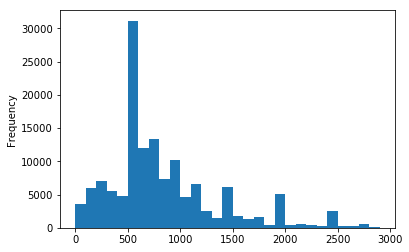

In [49]:
cut11.RendimentoMensalDotrabalho.plot.hist(bins = FaixasRenda)

___
## Análise e Resultados

___
## Conclusão 

Descreva aqui suas conclusões!